In [2]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

sns.set_style("whitegrid")

def extract_scores(data):
    ranking = []
    for k, v in data["results"].items():
        for k2, v2 in v.items():
            if k2 != "alias":
                v2 = v2 if v2 != "N/A" else np.nan
                ranking.append(
                    pd.DataFrame(index=[(k, k2)], data=[v2])
                )

    ranking = pd.concat(ranking).rename(columns={0:"score"}).astype(float)
    ranking.index = pd.MultiIndex.from_tuples(ranking.index)
    return ranking

In [3]:
LLAMA = "results_llama3_dyk/results.json"
LLAMA_ALT = "results_llama3_dyk_altered/results.json"
OPENBIO = "results_openbio_dyk/results.json"
OPENBIO_ALT = "results_openbio_dyk_altered/results.json"
BIELIK = "results_bielik_dyk/results.json"
BIELIK_ALT = "results_bielik_dyk_altered/results.json"

data = []
names = ["llama", "llama_alt", "openbio", "openbio_alt", "bielik", "bielik_alt"]

for name, file in zip(names, [LLAMA, LLAMA_ALT, OPENBIO, OPENBIO_ALT, BIELIK, BIELIK_ALT]):
    with open(file) as f:
        fdata = json.load(f)
        data.append(extract_scores(fdata).droplevel(0, axis=0).rename(columns={"score":name}))

data = pd.concat(data, axis=1)
data

,llama,llama_alt,openbio,openbio_alt,bielik,bielik_alt
"acc,none",0.225462,0.281827,0.185617,0.517007,0.688047,0.191448
"acc_stderr,none",0.013034,0.014032,0.012126,0.015586,0.014450,0.012271
"f1,none",0.303930,0.315107,0.292230,0.229457,0.404453,0.290102
"f1_stderr,none",NaN,NaN,NaN,NaN,NaN,NaN
"acc_norm,none",0.225462,0.281827,0.185617,0.517007,0.688047,0.191448
"acc_norm_stderr,none",0.013034,0.014032,0.012126,0.015586,0.014450,0.012271


<Axes: title={'center': 'F1 score'}>

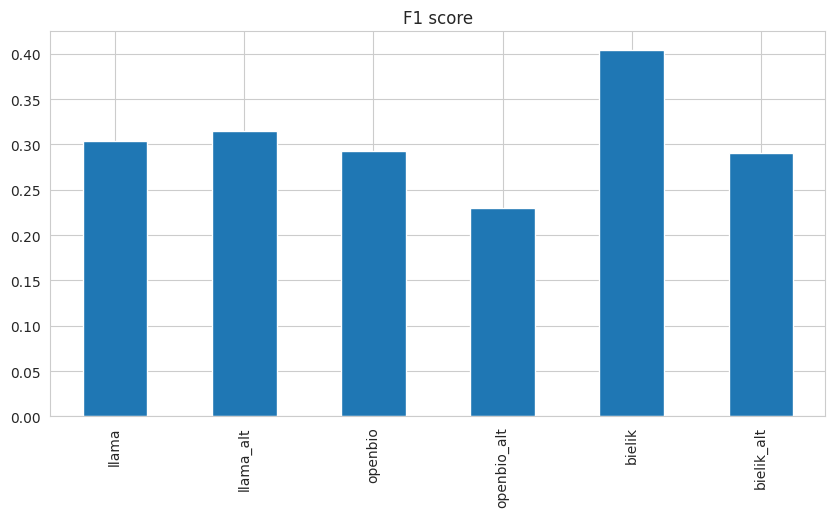

In [4]:
data.loc["f1,none"].plot(kind="bar", figsize=(10, 5), title="F1 score")


In [5]:
data["llama_diff"] = data["llama"] - data["llama_alt"]
data["openbio_diff"] = data["openbio"] - data["openbio_alt"]
data["bielik_diff"] = data["bielik"] - data["bielik_alt"]

AttributeError: module 'matplotlib.pyplot' has no attribute 'get_xticks'

In [15]:
ax.get_xticklabels()

[Text(0, 0, 'llama'),
 Text(1, 0, 'llama_alt'),
 Text(2, 0, 'openbio'),
 Text(3, 0, 'openbio_alt'),
 Text(4, 0, 'bielik'),
 Text(5, 0, 'bielik_alt'),
 Text(6, 0, 'llama_diff'),
 Text(7, 0, 'openbio_diff'),
 Text(8, 0, 'bielik_diff')]

In [19]:
ax.get_xticks()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

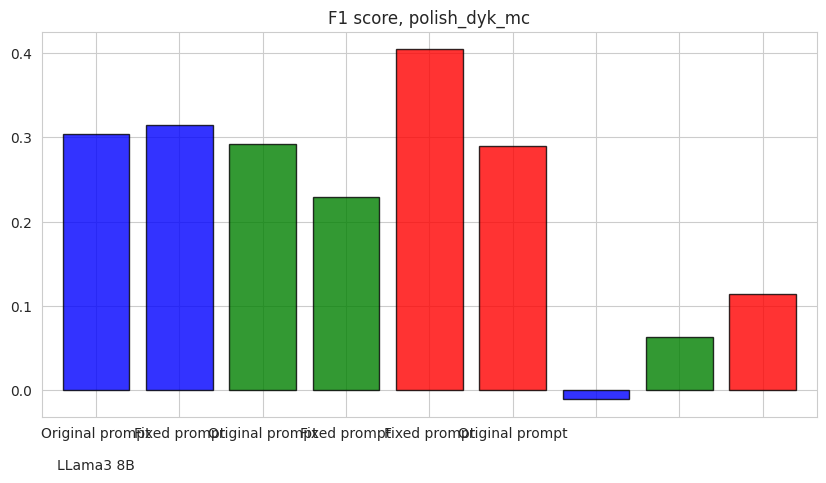

In [20]:
data.loc["f1,none"].plot(
    kind="bar", figsize=(10, 5), title="F1 score, polish_dyk_mc", 
    color=["blue", "blue", "green", "green", "red", "red", "blue", "green", "red"], alpha=0.8, width=0.8, edgecolor="black"
    )
ax = plt.gca()
plt.xticks(rotation=0)
ax.set_xticklabels(["Original prompt\n\nLLama3 8B", "Fixed prompt", "Original prompt", "Fixed prompt", "Fixed prompt", "Original prompt", "", "", ""])
plt.show()

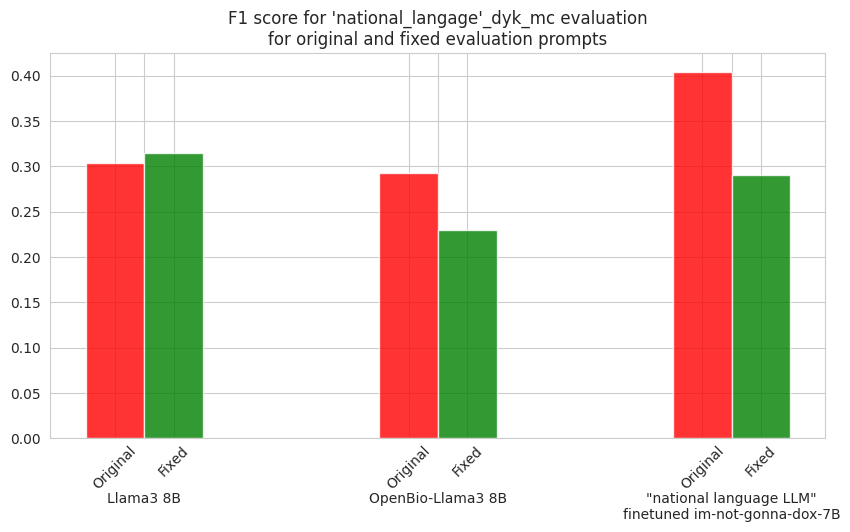

In [58]:
v = data.loc["f1,none"]

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

ind = np.arange(3)
width = .2 

x = list()
# x labels position: i = 1st bar, i+w/2 = category, i+w = 2nd bar
for i in ind:
    x.extend([i, i+width/2., i+width])   

# plot bars
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, v.to_list()[:-3:2], width, color='r', align = 'center', alpha=0.8)
rects2 = ax.bar(ind+width, v.to_list()[1:-2:2], width, color='g', align = 'center', alpha=0.8)
# set ticks and labels
plt.xticks(x)
ax.set_xticklabels(('Original','\n\n\nLlama3 8B', 'Fixed', 'Original','\n\n\nOpenBio-Llama3 8B', 'Fixed', 'Original','\n\n\n"national language LLM"\nfinetuned im-not-gonna-dox-7B', 'Fixed'),ha='center')
# hide tick lines for x axis
ax.tick_params(axis='x', which='both',length=0)
# rotate labels with A
for label in ax.get_xmajorticklabels():
    if not label.get_text().startswith("\n"): label.set_rotation(45)

plt.title("F1 score for 'national_langage'_dyk_mc evaluation\nfor original and fixed evaluation prompts")
plt.show()

In [35]:
v

llama           0.303930
llama_alt       0.315107
openbio         0.292230
openbio_alt     0.229457
bielik          0.404453
bielik_alt      0.290102
llama_diff     -0.011176
openbio_diff    0.062772
bielik_diff     0.114350
Name: f1,none, dtype: float64

In [34]:
v.to_list()[:-3:2]

[0.30393013100436683, 0.2922297297297297, 0.4044526901669759]

In [36]:
v.to_list()[1:-2:2]

[0.31510658016682114, 0.22945736434108527, 0.2901023890784983]